# Model Training

# 1.1 Import the data and Required Packages

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# modelling
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings


In [ ]:
df=pd.read_csv('data/raw.csv')

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [ ]:
X=df.drop(columns=['math_score'],axis=1)

In [ ]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group D,master's degree,standard,none,70,75
1,female,group C,bachelor's degree,free/reduced,completed,83,83
2,female,group D,some college,free/reduced,none,89,86
3,male,group C,master's degree,free/reduced,none,67,66
4,male,group E,high school,standard,none,64,57


In [ ]:
print("category in 'gender' variable: ",end=' ' )
print(df['gender'].unique())

print("category in 'race_ethnicity' variable: ",end=' ' )
print(df['race_ethnicity'].unique())

print("category in 'parental_level_of_education' variable: ",end=' ' )
print(df['parental_level_of_education'].unique())

print("category in 'lunch' variable: ",end=' ' )
print(df['lunch'].unique())

print("category in 'test_preparation_course' variable: ",end=' ' )
print(df['test_preparation_course'].unique())



category in 'gender' variable:  ['female' 'male']
category in 'race_ethnicity' variable:  ['group D' 'group C' 'group E' 'group B' 'group A']
category in 'parental_level_of_education' variable:  ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
category in 'lunch' variable:  ['standard' 'free/reduced']
category in 'test_preparation_course' variable:  ['none' 'completed']


In [ ]:
y=df['math_score']

In [ ]:
y

0      62
1      66
2      79
3      61
4      73
       ..
795    87
796    69
797    53
798    50
799    85
Name: math_score, Length: 800, dtype: int64

In [ ]:
# create column Transformer with 3 types of transformer
num_feature=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
X.shape

(800, 19)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.03079054,  0.43405338],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.9302895 ,  0.96470125],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.34544287,  1.1636942 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.52274728, -1.02522827],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.49143847, -1.02522827],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.48382733,  1.36268716]])

In [ ]:
# Separate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((640, 19), (160, 19))

In [ ]:
#Create an Evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square
    

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3050
- Mean Absolute Error: 4.2205
- R2 Score: 0.8769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4502
- Mean Absolute Error: 4.4969
- R2 Score: 0.8587


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5591
- Mean Absolute Error: 5.1721
- R2 Score: 0.8118
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2419
- Mean Absolute Error: 4.9192
- R2 Score: 0.8147


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3054
- Mean Absolute Error: 4.2181
- R2 Score: 0.8769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4432
- Mean Absolute Error: 4.4916
- R2 Score: 0.8591


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7955
- Mean Absolute Error: 4.6469
- R2 Score: 0.8531
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.859082
0,Linear Regression,0.858716
5,Random Forest Regressor,0.825111
1,Lasso,0.814692
6,AdaBoost Regressor,0.806104
3,K-Neighbors Regressor,0.745812
4,Decision Tree,0.714211


# Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.87


# Plot y_pred and y_test

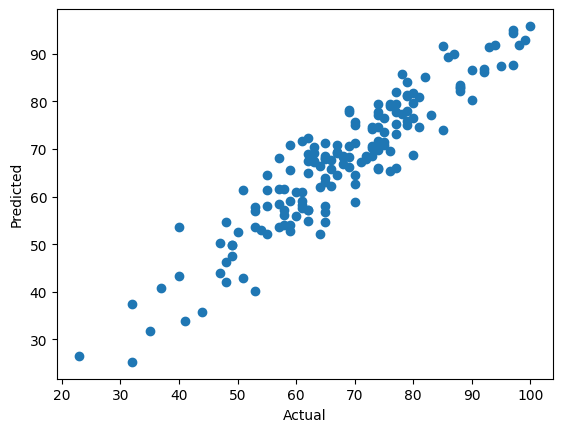

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

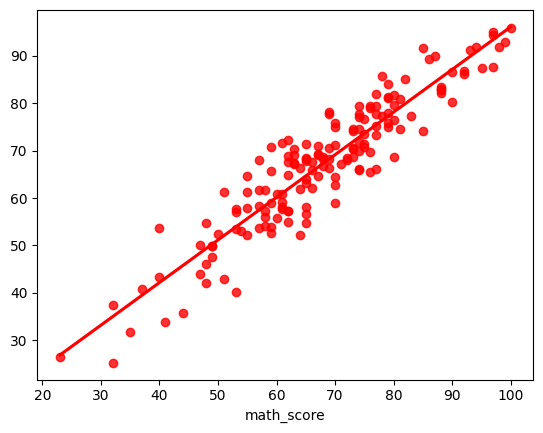

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
696,65,71.281770,-6.281770
667,59,58.980196,0.019804
63,63,70.364667,-7.364667
533,74,65.840368,8.159632
66,69,68.221324,0.778676
...,...,...,...
589,77,81.888710,-4.888710
798,50,52.498197,-2.498197
744,49,47.518389,1.481611
513,77,79.460910,-2.460910
